## Visualizando os ganhos de recém-formados de acordo com suas formações

Neste projeto analisarei um conjunto de dados no qual é possível obter informações acerca dos resultados profissionais obtidos por por recém-formados graduados entre 2010 e 2012. Os dados foram divulgados pela <a href="https://www.census.gov/programs-surveys/acs/">American Community Survey</a> um órgão que realiza pesquisas agrega diversas informações sobre a população americana.

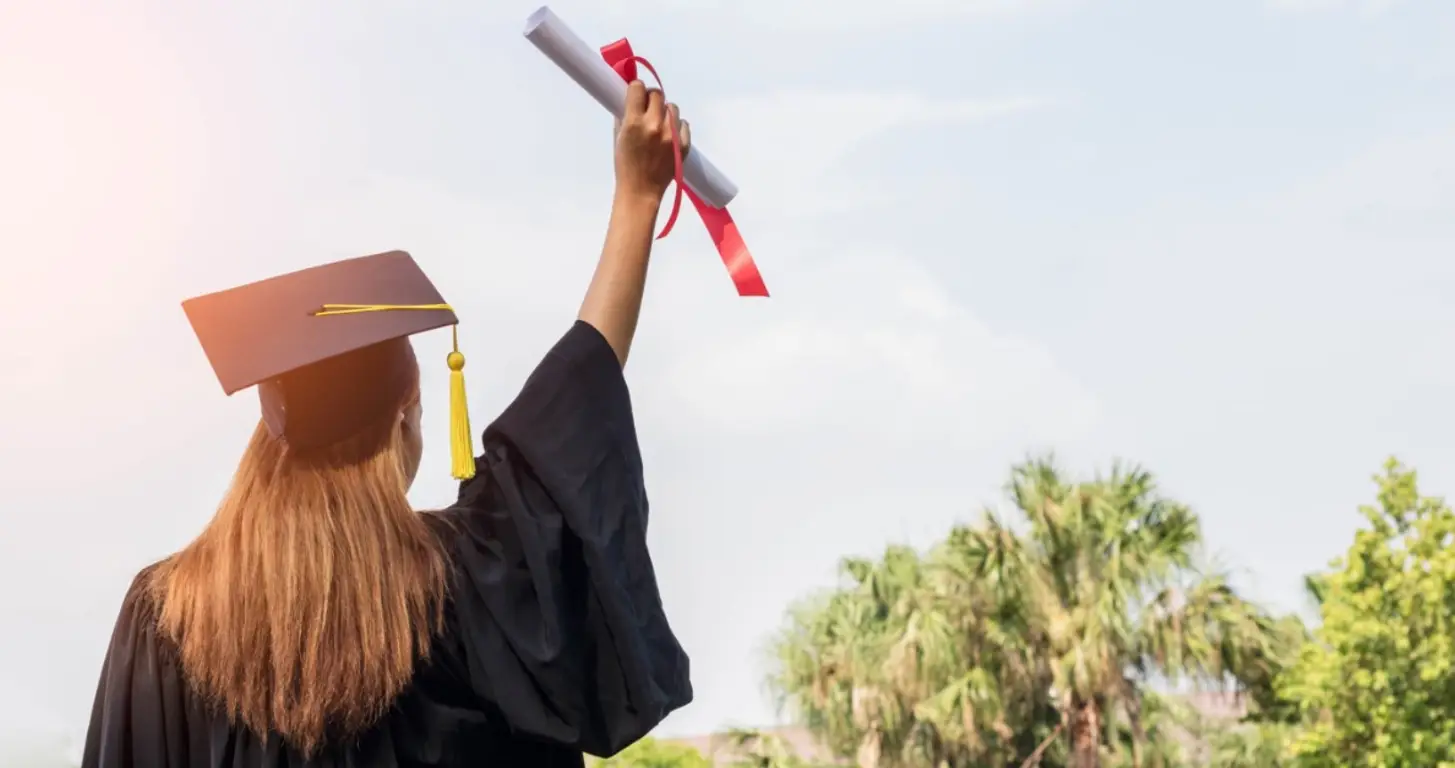

Cada linha do conjunto de dados representa um dos bacharelados dos recém-formados. Além disso, o conjunto de dados contem informações sobre gênero, taxas de emprego, salários medianos e muito mais. Abaixo é possível ver uma descrição sutil de cada coluna do dataset:

**Rank** - Classificação por ganhos médios (o conjunto de dados é ordenado por esta coluna). <br>
**Major_code** - Código principal. <br>
**Major** - Descrição do bacharelado. <br>
**Major_category** - Categoria do bacharelado. <br>
**Total** - Número total de pessoas com o bacharelado. <br>
**Sample_size** - Tamanho da amostra. <br>
**Men** - Graduados do sexo masculino. <br>
**Women** - Graduados do sexo feminino. <br>
**ShareWomen** - Proporção de mulheres graduadas. <br>
**Employed** - Quantidade de profissionais empregados. <br>
**Median** - Média do salário dos trabalhadores que atuam em tempo integral, durante todo o ano. <br>
**Low_wage_jobs** - Número de empregados em funções de baixa remuneração. <br>
**Full_time** - Número de empregados que atuam sob regime de 35 horas ou mais. <br>
**Part_time** - Número de empregados que atuam sob regime de menos de 35 horas. <br>

Utilizando visualizações, podemos responder questões inerentes ao conjunto de dados, como:

- Bacharéis em cursos de maior popularidade ganham mais? <br>
- Quantos dos cursos são predominantemente dominados por homens? E por mulheres? <br>
- Qual categoria de cursos possui mais estudantes?

## Importando dados

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [47]:
%matplotlib inline

In [80]:
# Importar dataframe
recent_grads = pd.read_excel(r'C:\Users\msantos\Downloads\recent-grads1.xlsx')

In [81]:
# Checar quantidade de linhas e colunas
raw_data_count = recent_grads.shape
raw_data_count

(173, 21)

In [82]:
# Retorna a primeira linha do conjunto de dados em formato tabela
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [83]:
# Gerar estatísticas sobre o conjunto de dados
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [84]:
recent_grads[['Major', 'Full_time']]

,Major,Full_time
0,PETROLEUM ENGINEERING,1849
1,MINING AND MINERAL ENGINEERING,556
2,METALLURGICAL ENGINEERING,558
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1069
4,CHEMICAL ENGINEERING,23170
...,...,...
168,ZOOLOGY,5043
169,EDUCATIONAL PSYCHOLOGY,1848
170,CLINICAL PSYCHOLOGY,1724
171,COUNSELING PSYCHOLOGY,3154


In [85]:
# Retornar primeiras e ultimas linhas do conjunto de dados
print(recent_grads.head())
print(recent_grads.tail())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0  

In [86]:
# Remover linhas contendo valores faltantes
recent_grads = recent_grads.dropna()

In [87]:
# Checar quantidade de linhas e colunas após a remoção das linhas contendo valores faltantes
cleaned_data_count = recent_grads.shape
cleaned_data_count

(172, 21)

# Visualizando dados

### Gráficos de Dispersão

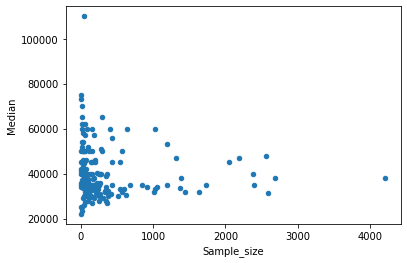

In [88]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

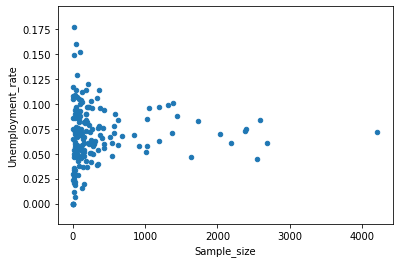

In [89]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

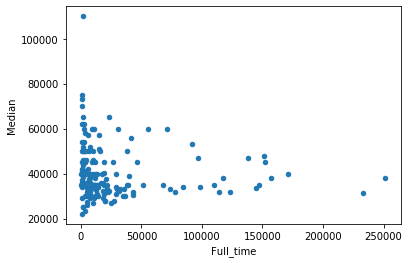

In [90]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

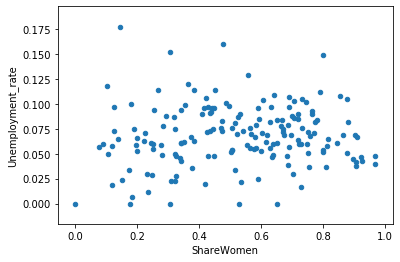

In [91]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

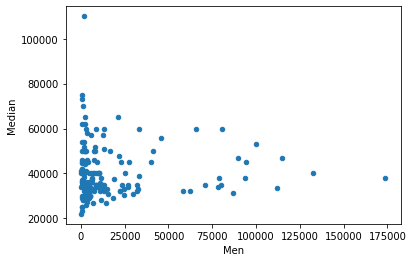

In [92]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

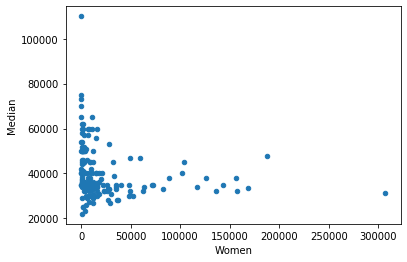

In [93]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

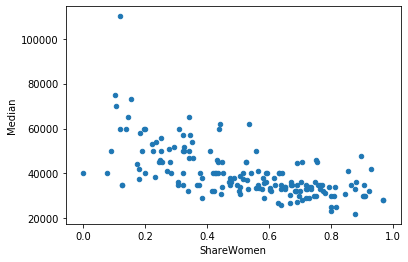

In [94]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')

#### Observações

- Bacharéis em cursos mais famosos não necessariamente têm uma renda maior
- Bacharéis que se formaram em cursos cuja maioria é composta por mulheres têm uma renda menor

### Histogramas

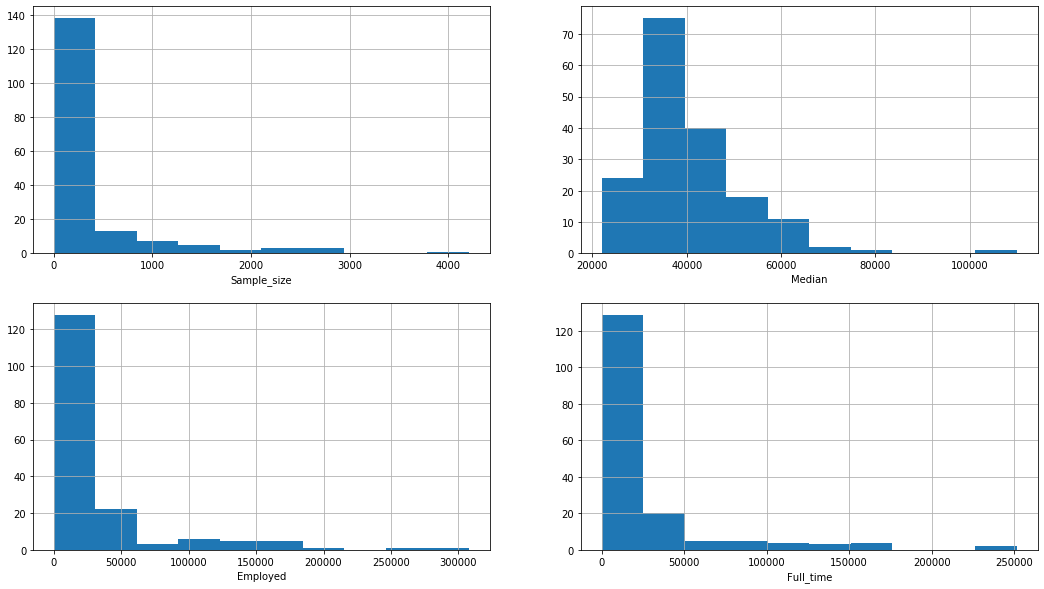

In [95]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(18,10))
for r in range(0,4):
    ax = fig.add_subplot(2,2,r+1)
    ax = recent_grads[cols[r]].hist()
    ax.set_xlabel(cols[r])

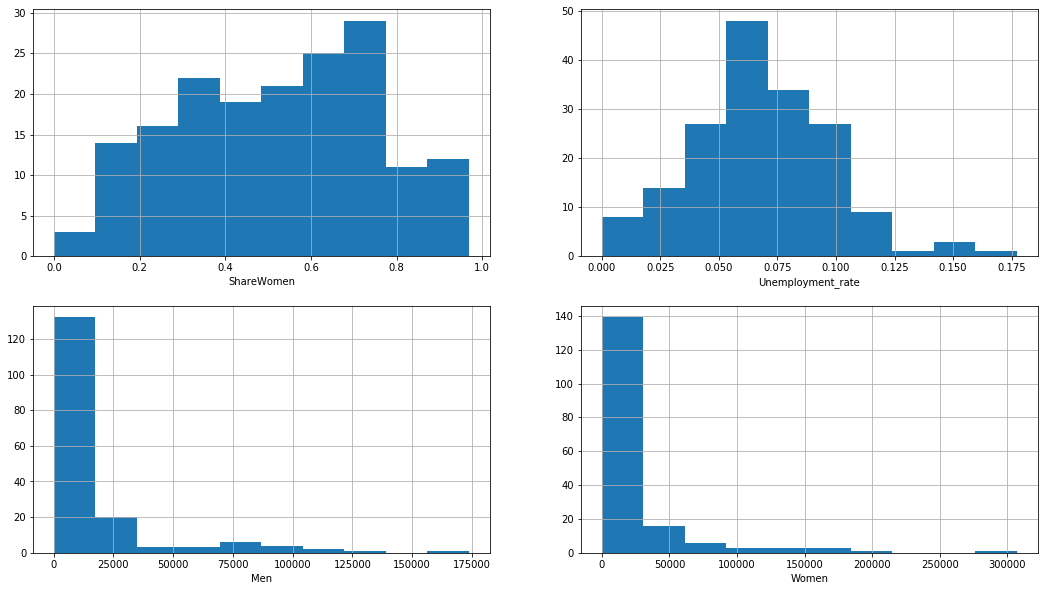

In [96]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(18,10))
for r in range(4,8):
    ax = fig.add_subplot(2,2,r-3)
    ax = recent_grads[cols[r]].hist()
    ax.set_xlabel(cols[r])

#### Observações

- Aproximadamente 20% dos bacharelados possuem recém-formados predominantemente compostos pelo sexo masculino
- Aproximadamente 20% dos bacharelados possuem recém-formados predominantemente compostos pelo sexo feminino
- A média salarial mais comum é de \\$30.000 a \\$40.000

### Matriz de gráficos de dispersão

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3D8821448>,
      dtype=object)

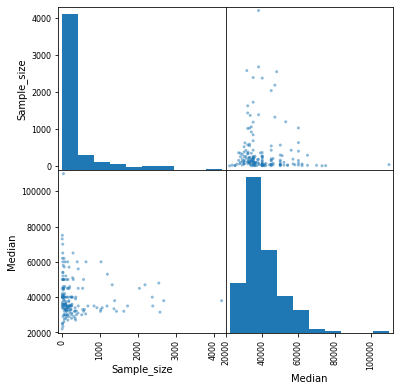

In [97]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3D89E59C8>,
      dtype=object)

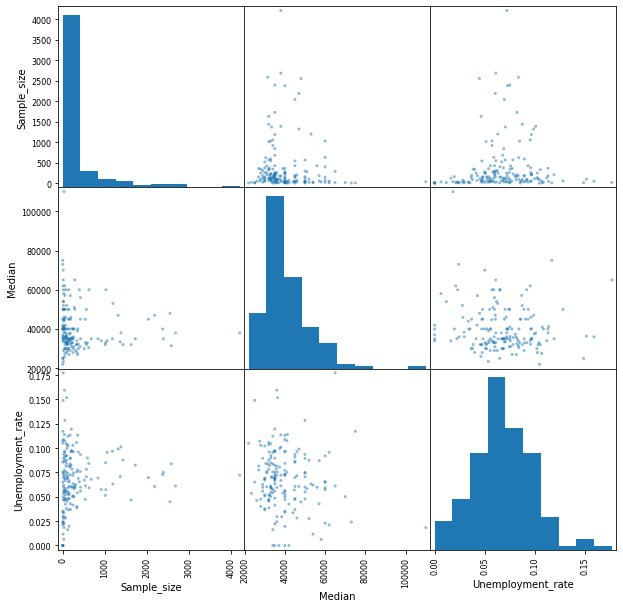

In [98]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

### Gráficos de Barras

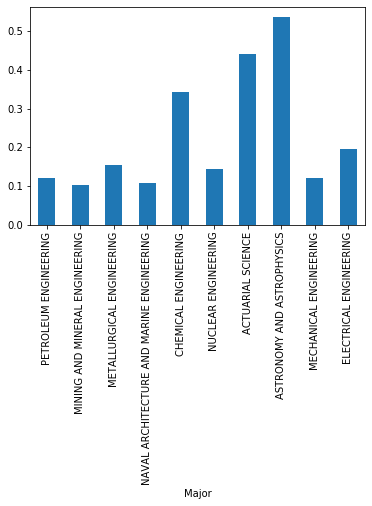

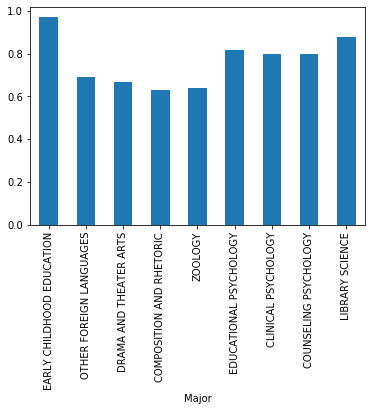

In [99]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)